# STAT1000J : US Macroeconomics Analysis
by Philip Tjuatja 524370990065 and Ethan Kahn Firtanto 5243709900

Source of Data: https://www.kaggle.com/datasets/khushikyad001/finance-and-economics-dataset-2000-present

The Finance & Economics Dataset provides daily financial and macroeconomic data, including stock market prices, GDP growth, inflation, interest rates, consumer spending, exchange rates, and more. It is designed for use in:

- ✔ Financial Market Analysis – Track stock index movements and trading volumes.
- ✔ Macroeconomic Research – Study economic trends, including inflation and GDP growth.
- ✔ Investment Decision Making – Evaluate interest rates, corporate profits, and consumer confidence.
- ✔ Machine Learning & Predictive Analytics – Develop forecasting models for economic indicators.

This dataset is valuable for economists, investors, data scientists, researchers, and policymakers.


In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [226]:
original_df = pd.read_csv('finance_economics_dataset.csv')
original_df 

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008-03-14,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,2008-03-16,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


In [227]:
original_df = pd.read_csv('finance_economics_dataset.csv')
df = original_df[['Date', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Government Debt (Billion USD)', 'Bankruptcy Rate (%)', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 'Consumer Spending (Billion USD)', 'Consumer Confidence Index']].dropna()

df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df


,Date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),Government Debt (Billion USD),Bankruptcy Rate (%),Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Consumer Spending (Billion USD),Consumer Confidence Index
0,2000-01-01,-0.37,6.06,6.10,6.06,27271,2.12,47.20,1052.34,4589,114
1,2000-01-02,3.19,4.95,6.62,2.19,16160,1.40,52.84,1957.73,10101,101
2,2000-01-03,5.54,9.13,2.60,0.82,29962,0.79,78.80,2339.49,13665,92
3,2000-01-04,10.00,3.77,2.20,3.71,12745,4.22,28.18,1308.54,5192,112
4,2000-01-05,1.53,2.20,8.20,4.56,22293,2.21,92.20,2210.08,10688,99
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008-03-14,8.84,7.00,10.44,7.29,10296,8.75,61.98,2385.41,2200,117
2996,2008-03-15,-1.88,9.15,5.61,8.46,16160,5.07,31.61,2147.13,5261,78
2997,2008-03-16,4.07,0.88,8.91,4.80,15186,5.78,45.64,1943.61,12039,85
2998,2008-03-17,1.06,8.61,10.15,7.60,6495,2.35,123.25,2211.40,11979,106


## Queries and Dataset Exploration
We create queries to figure out:
- The time period where the US has an inflation rate of over 10%.
- Average GDP growth per year.

In [228]:
pivot_df = df.copy()
pivot_df['Year'] = pivot_df['Date'].dt.year
pivot_table = pivot_df.pivot_table(index='Year', 
                             values=['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 
                                     'Interest Rate (%)', 'Government Debt (Billion USD)', 'Bankruptcy Rate (%)', 
                                     'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 'Consumer Spending (Billion USD)'], 
                             aggfunc='mean').sort_index(ascending=True)
pivot_table


,Bankruptcy Rate (%),Consumer Spending (Billion USD),Crude Oil Price (USD per Barrel),GDP Growth (%),Gold Price (USD per Ounce),Government Debt (Billion USD),Inflation Rate (%),Interest Rate (%),Unemployment Rate (%)
Year,,,,,,,,,
2000,5.074399,7377.177596,84.658934,2.087049,1694.044399,15894.841530,5.404727,5.092459,8.659235
2001,5.070192,7259.580822,84.038000,2.910247,1648.132548,14537.498630,5.051068,5.287863,8.859781
2002,4.807342,7590.410959,89.407973,2.431507,1656.952438,15601.495890,4.981781,5.206000,8.988247
2003,5.069808,7804.104110,83.356630,2.858192,1656.435178,15520.501370,5.028685,5.225479,8.599068
2004,4.801448,7763.879781,86.253197,2.839727,1677.175929,14120.333333,5.071967,5.124536,8.500191
2005,5.138712,7732.621918,85.585836,2.541315,1636.019397,15775.660274,5.132740,5.349479,8.710877
2006,5.028521,7558.443836,87.158712,2.746329,1631.083562,15117.367123,5.136822,5.288247,8.303671
2007,5.010630,7390.679452,84.741041,2.404082,1644.866603,16388.876712,4.934110,5.138493,8.691342
2008,5.281795,7238.782051,81.420897,2.859615,1638.631282,15209.230769,5.246410,5.377051,8.656026


In [229]:
# Use query to find rows with specific conditions

# Filter for inflation rates less than or equal to 1% and select Inflation Rate and CCI
high_inflation = df.query('`Inflation Rate (%)` <= 1')[['Inflation Rate (%)', 'Consumer Confidence Index']].sort_values(by='Consumer Confidence Index', ascending=False)
# Display the result
high_inflation

,Inflation Rate (%),Consumer Confidence Index
2772,0.04,119
1512,0.71,119
701,0.06,119
1377,0.90,118
2584,0.87,118
...,...,...
1278,0.98,52
1779,0.37,52
2197,0.03,51
1165,0.93,51


## Visualisations


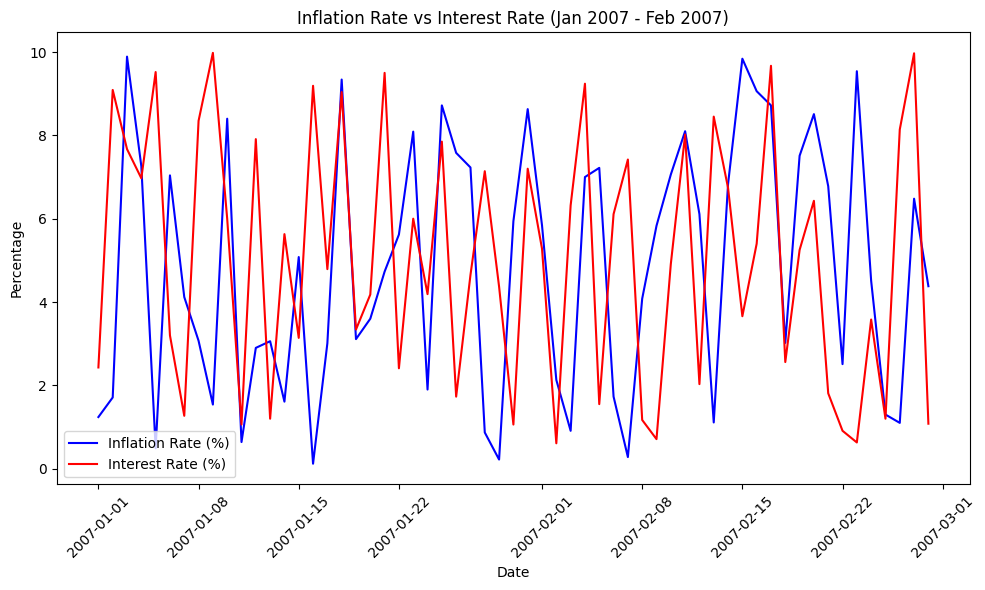

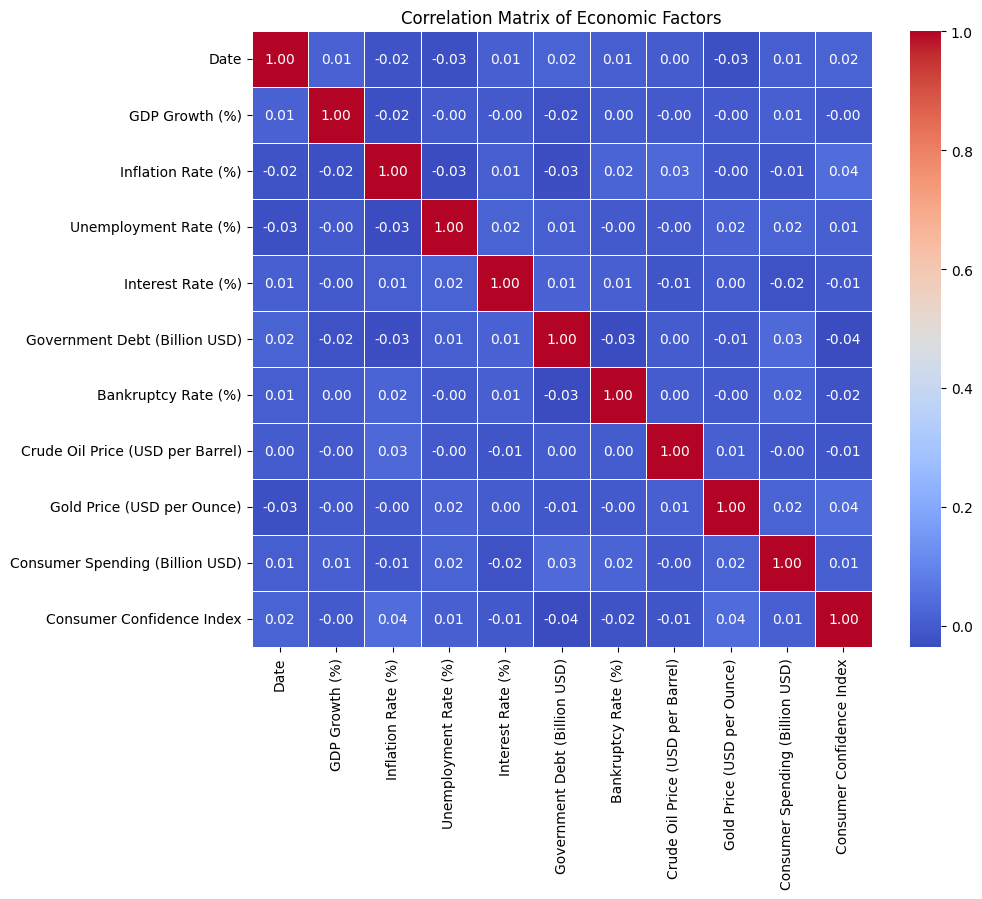

In [230]:

# Assuming your dataframe 'df' contains a 'Date' column
# Convert 'Date' to datetime if it's not already in that format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter data for the period from January 2007 to February 2007
df_filtered = df[(df['Date'].dt.year == 2007) & (df['Date'].dt.month.isin([1, 2]))]

# Sort by Date to ensure the time series is in order
df_filtered = df_filtered.sort_values('Date')

# Plot Inflation Rate and Interest Rate over time (January to February 2007)
plt.figure(figsize=(10, 6))

plt.plot(df_filtered['Date'], df_filtered['Inflation Rate (%)'], label='Inflation Rate (%)', color='blue')
plt.plot(df_filtered['Date'], df_filtered['Interest Rate (%)'], label='Interest Rate (%)', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Inflation Rate vs Interest Rate (Jan 2007 - Feb 2007)')

# Adding a legend
plt.legend()

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Heatmap of correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Economic Factors')
plt.show()

## Hypothesis
Hypothesis: “An increase in interest rates would lead to a decrease in consumer spending."

In [231]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
df = df.sort_values('Date')  # Sort the data by date

# Calculate the change in Interest Rates (Interest Rate tomorrow - Interest Rate today)
df['Interest Rate Change'] = df['Interest Rate (%)'].diff()

# Calculate the change in Consumer Spending (Consumer Spending tomorrow - Consumer Spending today)
df['Consumer Spending Change'] = df['Consumer Spending (Billion USD)'].diff()

# Drop the first row because it will have NaN for the change values
df = df.dropna(subset=['Interest Rate Change', 'Consumer Spending Change'])


X = df['Interest Rate Change']
y = df['Consumer Spending Change']

# Perform Pearson's correlation test
corr, p_value = pearsonr(X, y)

print(f"Pearson Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

# Add constant term for intercept
X_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_const).fit()

# Show the regression summary
print(model.summary())

Pearson Correlation Coefficient: -0.03
P-value: 0.1354
                               OLS Regression Results                               
Dep. Variable:     Consumer Spending Change   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                  0.000
Method:                       Least Squares   F-statistic:                     2.231
Date:                      Sun, 27 Jul 2025   Prob (F-statistic):              0.135
Time:                              04:08:27   Log-Likelihood:                -30292.
No. Observations:                      2999   AIC:                         6.059e+04
Df Residuals:                          2997   BIC:                         6.060e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------

Hypothesis: "High inflation rates would lead to a low Consumer Confidence Index. "

In [232]:

# Assuming df has 'Inflation Rate (%)' and 'CCI' columns
X = df['Inflation Rate (%)']
y = df['Consumer Confidence Index']  # Consumer Confidence Index

# Perform Pearson's correlation test
corr, p_value = pearsonr(X, y)

print(f"Pearson Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

# Define X and y for regression
X_const = sm.add_constant(X)  # Add intercept term (constant)
y = df['Consumer Confidence Index']

# Fit the regression model
model = sm.OLS(y, X_const).fit()

# Show the regression results
print(model.summary())



Pearson Correlation Coefficient: 0.04
P-value: 0.0187
                                OLS Regression Results                               
Dep. Variable:     Consumer Confidence Index   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                  0.002
Method:                        Least Squares   F-statistic:                     5.535
Date:                       Sun, 27 Jul 2025   Prob (F-statistic):             0.0187
Time:                               04:08:27   Log-Likelihood:                -13269.
No. Observations:                       2999   AIC:                         2.654e+04
Df Residuals:                           2997   BIC:                         2.655e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]

## Predictive Model


In [250]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format
df = df.sort_values('Date')  # Sort by date for sequential processing

# Define the list of constant variables (exclude the target and 'Inflation Rate')
constant_vars = ['GDP Growth (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Bankruptcy Rate (%)']

# Calculate the 10% range for each of these variables (to remain constant)
constant_range = df[constant_vars].apply(lambda x: 0.5 * x)

# Create a DataFrame to store filtered data that meets the ±10% range condition
filtered_df = df.copy()
def within_range(x, column_name):
    # Calculate ±10% change from the original value
    return abs(x.diff()) <= 0.5 * df[column_name]

for var in constant_vars:
    filtered_df[f'{var}_diff'] = filtered_df[var].diff().abs()  # Calculate absolute difference
    filtered_df = filtered_df[filtered_df[f'{var}_diff'] <= (0.7 * filtered_df[var])]  # Apply the ±10% condition

# Drop the temporary columns used for filtering
filtered_df = filtered_df.drop(columns=[f'{var}_diff' for var in constant_vars])

# Now, df contains the data where the other variables are within ±10% of their previous values.
# Select 'Inflation Rate (%)' and 'CCI' for training
training_data = filtered_df[['Inflation Rate (%)', 'Consumer Confidence Index']].dropna()
training_data

,Inflation Rate (%),Consumer Confidence Index
56,9.91,81
63,6.84,119
71,7.24,70
91,3.43,81
127,6.63,110
...,...,...
2944,3.81,71
2952,2.13,82
2953,4.74,93
2991,4.90,86


Mean Absolute Error: 966.4507252275437
Mean Squared Error: 1268795.461105937
R-squared: -0.02634942540769436


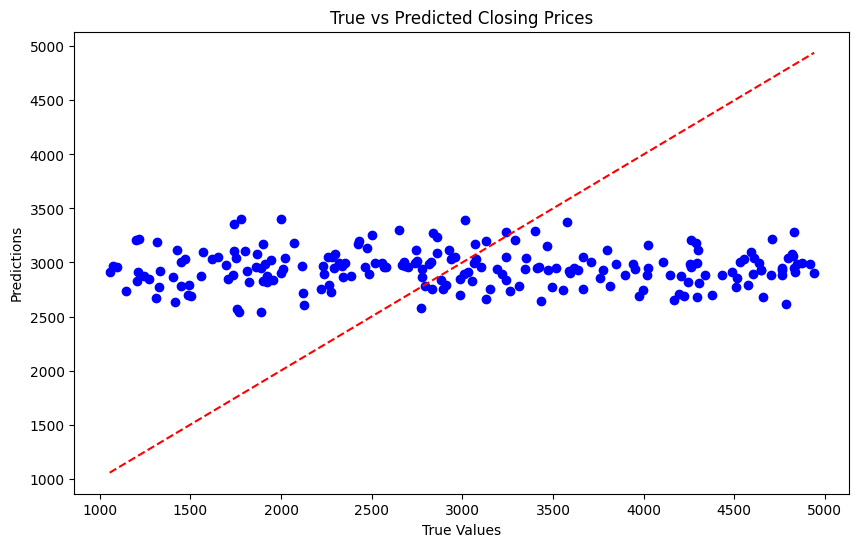

In [262]:
sp_500_data = original_df[original_df['Stock Index'] == 'S&P 500']

# Step 4: Select relevant columns for prediction
# Features: economic indicators
features = ['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 
            'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 
            'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
            'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
            'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)']

target = 'Close Price'  # Column for the closing price of S&P 500
X = sp_500_data[features]
y = sp_500_data[target]

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 9: Visualize the results (True vs Predicted Closing Prices)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Closing Prices')
plt.show()



Mean Absolute Error: 1048.6699744591347
Mean Squared Error: 1562208.8903652658
R-squared: -0.2636963530714509


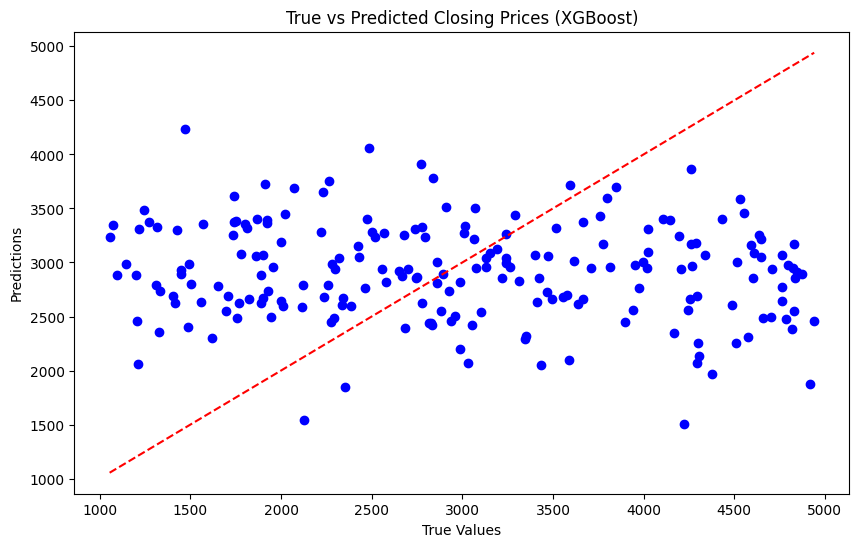

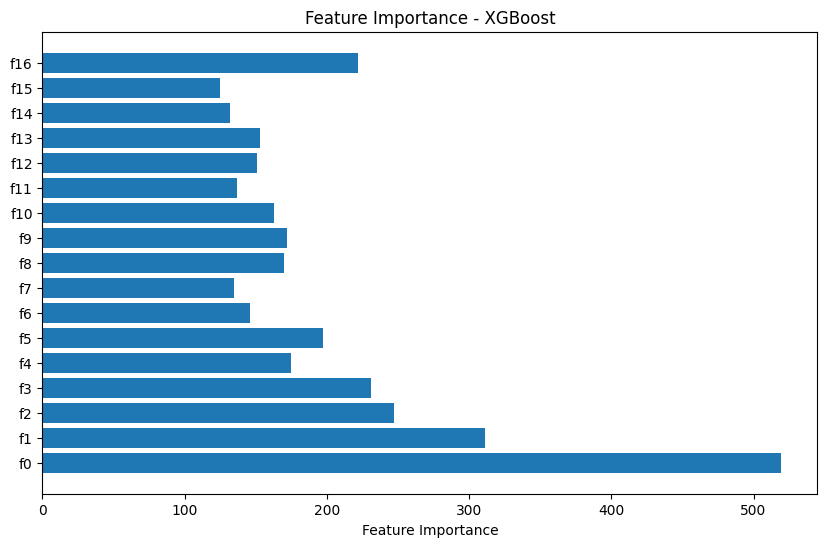

Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 50, 'subsample': 1.0}
Cross-validated MSE: -1332073.766645013


In [263]:

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Step 9: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 10: Visualize the results (True vs Predicted Closing Prices)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Closing Prices (XGBoost)')
plt.show()

# Step 11: Feature Importance (to understand which features have the most impact on predictions)
# Use xgb_model.get_booster() to access the booster and get feature importance
booster = xgb_model.get_booster()
importances = booster.get_score(importance_type='weight')

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(list(importances.keys()), list(importances.values()))
plt.xlabel('Feature Importance')
plt.title('Feature Importance - XGBoost')
plt.show()

# Step 12: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

# Step 13: Cross-validation to assess performance
scores = cross_val_score(xgb.XGBRegressor(objective='reg:squarederror', **grid_search.best_params_),
                         X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-validated MSE: {scores.mean()}")

c:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Absolute Error: 1024.2521159278408
Mean Squared Error: 1396709.3158861226
R-squared: -0.0396003344739666


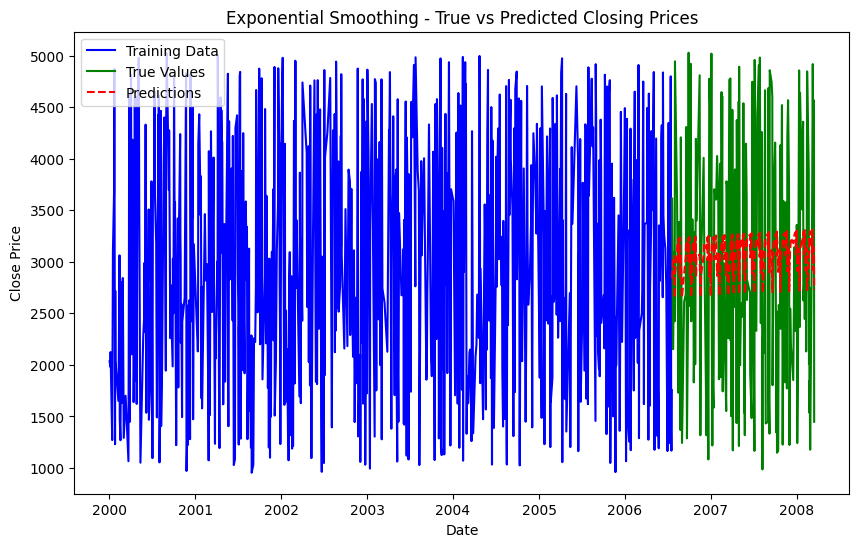

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the dataset
df = pd.read_csv('finance_economics_dataset.csv')

# Step 2: Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
df = df[df['Stock Index'] == 'S&P 500']  # Filter for S&P 500
df.set_index('Date', inplace=True)  # Set Date as the index

# Step 3: Extract the Close Price (target variable for forecasting)
closing_prices = df['Close Price']

# Step 4: Train-test split (let's split the last 20% as the test set)
train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[:train_size], closing_prices[train_size:]

# Step 5: Fit the Exponential Smoothing Model
# Holt-Winters Exponential Smoothing model to account for trend and seasonality
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
hw_model = model.fit()

# Step 6: Make predictions
predictions = hw_model.forecast(len(test))

# Step 7: Evaluate the model performance
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 8: Visualize the results (True vs Predicted)
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='True Values', color='green')
plt.plot(test.index, predictions, label='Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Exponential Smoothing - True vs Predicted Closing Prices')
plt.legend()
plt.show()


c:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Absolute Error: 1008.9340738277645
Mean Squared Error: 1428593.964026558
R-squared: -0.06309511714692495


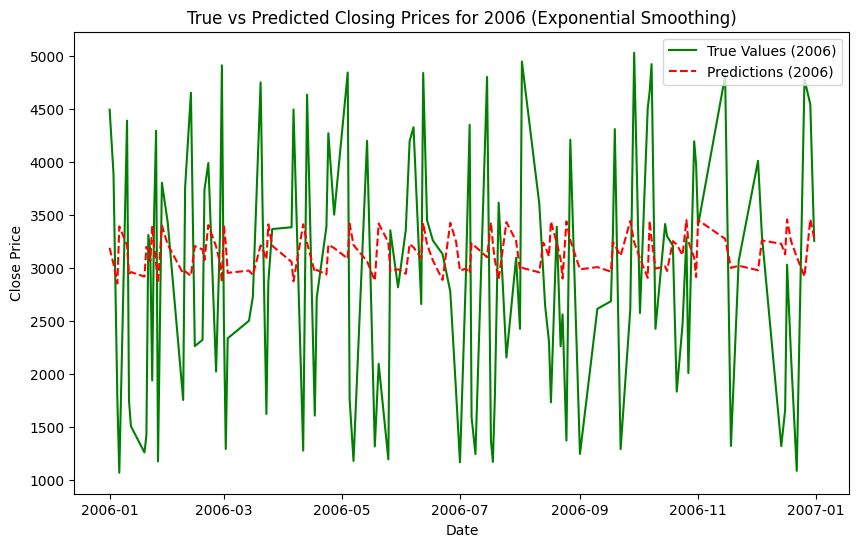

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the dataset
df = pd.read_csv('finance_economics_dataset.csv')

# Step 2: Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
df = df[df['Stock Index'] == 'S&P 500']  # Filter for S&P 500
df.set_index('Date', inplace=True)  # Set Date as the index

# Step 3: Filter the training data from 2000 to 2005
train_data = df['2000-01-01':'2005-12-31']['Close Price']

# Step 4: Filter the test data for 2006 (the actual data we want to compare predictions with)
test_data = df['2006-01-01':'2006-12-31']['Close Price']

# Step 5: Fit the Exponential Smoothing Model
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
hw_model = model.fit()

# Step 6: Make predictions for 2006
predictions_2006 = hw_model.forecast(len(test_data))

# Step 7: Evaluate the model's performance on 2006 data
mae = mean_absolute_error(test_data, predictions_2006)
mse = mean_squared_error(test_data, predictions_2006)
r2 = r2_score(test_data, predictions_2006)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 8: Visualize the results (True vs P
# Step 8: Visualize the results (True vs Predicted for 2006)
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='True Values (2006)', color='green')
plt.plot(test_data.index, predictions_2006, label='Predictions (2006)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('True vs Predicted Closing Prices for 2006 (Exponential Smoothing)')
plt.legend()
plt.show()
